
  Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. In this example, you are going to build, train, and check validation error of fully connected/dense neural networks that can predict the compressive strength of concrete. 

  The data set can be downloaded from https://www.kaggle.com/datasets/ryanholbrook/dl-course-data?select=concrete.csv. I can provide you data set as well. 
  
    1.How many input features you have for this data and write their names
    2.How many labels you have for this data? Write their  names
    3.Plot the data (input feature vs output) 

  Now you prepare data for training and testing neural network using step 1 to 3.
  Read read concrete.csv file (note that you need to have concrete.csv file in correct folder) 


In [2]:
import pandas as pd
df = pd.read_csv("concrete.csv")
df.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


1.Seperating input and output


In [3]:
y_data= df['CompressiveStrength'] # extract the outputs
X_data = df.drop('CompressiveStrength', axis=1) # delete the output inputs


2.Data splitting: You need to  split data into training and validation set. You are going to use train_test_split  from sklearn. Yon need to import as follows, 


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)


3.Now you use the following code to make training set with input and output together



In [9]:
import tensorflow as tf
#define batch size
BATCH_SIZE=32

train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)) # create a dataset from X_train and y_train
train_ds = train_ds.repeat()
train_ds = train_ds.shuffle(buffer_size=len(X_train)) # shuffle the dataset
train_ds = train_ds.batch(BATCH_SIZE) # batch the dataset
train_ds = train_ds.prefetch(tf.data.experimental.AUTOTUNE) # prefetch the dataset to improve performance

# create a dataset from the testing data and make a data pipeline
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)) # create a dataset from X_test and y_test
test_ds = test_ds.repeat() # repeat the dataset
test_ds = test_ds.batch(BATCH_SIZE) # batch the dataset
test_ds = test_ds.prefetch(tf.data.experimental.AUTOTUNE) # prefetch the dataset to improve performance


4.Now you plan to use dense neural network to predict the strength. To do this, you implement a fully connected neural networks (start with two hidden layers, (hidden layer one has 32 units/neurons and hidden layer two has 16 units/neurons) and one output layer.  Your code should print your model summary. A sample code is given below.


In [26]:
from keras.models import Sequential
from keras.layers import Dense

mymodel = Sequential()

# input and Hidden layer-1
mymodel.add(Dense(units=512, input_dim=8, kernel_initializer='normal',activation='relu'))
# Hidden layer-2
mymodel.add(Dense(units=256, kernel_initializer='normal', activation='relu'))
# Hidden layer-3
mymodel.add(Dense(units=128, kernel_initializer='normal', activation='relu'))
# Hidden layer-4
mymodel.add(Dense(units=64, kernel_initializer='normal', activation='relu'))
# Hidden layer-5
mymodel.add(Dense(units=32, kernel_initializer='normal', activation='relu'))
# output layer
mymodel.add(Dense(units=1, kernel_initializer='normal'))
print(mymodel.summary())


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 512)               4608      
                                                                 
 dense_15 (Dense)            (None, 256)               131328    
                                                                 
 dense_16 (Dense)            (None, 128)               32896     
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dense_19 (Dense)            (None, 1)                 33        
                                                                 
Total params: 179201 (700.00 KB)
Trainable params: 179

5.Once you created your NN, compile and train your implemented dense neural network using following command


In [27]:
# Training our model build above

mymodel.compile(loss='mean_squared_error', optimizer='adam')

hist = mymodel.fit(train_ds, steps_per_epoch=len(X_train)//32, validation_data=test_ds, validation_steps=len(y_test)//32, epochs=100)



Epoch 1/100
25/25 [==============================] - 1s 5ms/step - loss: 524.2197 - val_loss: 281.7190
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 239.4609 - val_loss: 194.8682
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 174.3444 - val_loss: 155.7840
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 149.5029 - val_loss: 133.9583
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 127.3110 - val_loss: 116.3892
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 127.5379 - val_loss: 98.9407
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 114.8860 - val_loss: 88.9872
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 108.2108 - val_loss: 86.2857
Epoch 9/100
25/25 [==============================] - 0s 5ms/step - loss: 95.6515 - val_loss: 81.4270
Epoch 10/100
25/25 [==============================] - 0s 5ms/step - loss: 90.7

6.While training of your NN is progressing you can plot training and validation error over various epoch using the following code


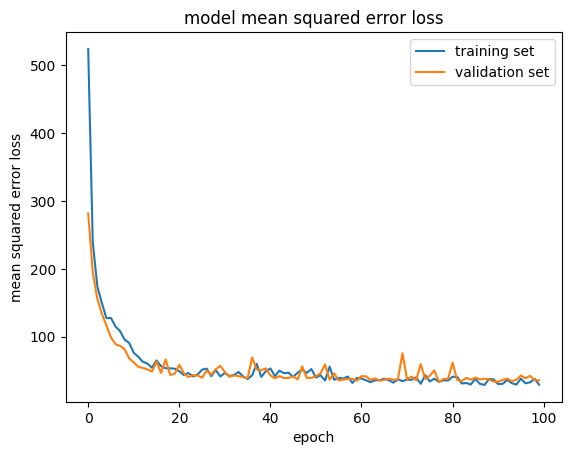

In [28]:
import matplotlib.pyplot as plt

# lets plot the model's history
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()


7.Check the validation loss while varying some hyper parameters e.g., number of layers, the number of data points (training and testing), the number of epochs you train and different activation function.


8.Say you want to have validation loss around 40.00 or less consistently (Note that same network, same data set, and same hyper parameter may give you different validation error due to some randomness if you run multiple times. So, you run your code couple of times and check if you are always getting validation loss around 40.00 or less). You will see above given model is not achieving the desired validation loss. You need to fix this issue. Make a comment which option worked to achieve the desired validation loss.  


9.Now you select the model based on your requirement of validation error. Use your selected trained model to predict output y_pred corresponding all the inputs i.e.,  X_test. You can use following command to do so.  Plot the difference between model predicted output vs true output y_test.   Make a comment on the magnitude of the error. 


7/7 [==============================] - 0s 1ms/step


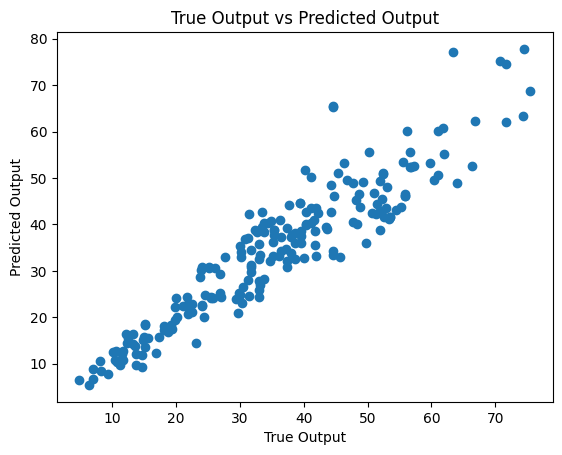

In [29]:
# Predicting output using trained model
y_pred=mymodel.predict(X_test)
# Plotting the difference between model predicted output vs true output y_test
plt.scatter(y_test, y_pred)
plt.xlabel('True Output')
plt.ylabel('Predicted Output')
plt.title('True Output vs Predicted Output')
plt.show()